# Word2Vec을 이용해서 영화리뷰 분석하기

In [1]:
import tensorflow as tf
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import nltk
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup


In [2]:
import pandas as pd

# 레이블인 sentiment가 있는 학습 데이터
train = pd.read_csv("datasets/data_of_word2vec_nlp_tutorial/labeledTrainData.tsv",
                    header=0, delimiter='\t', quoting=3)

# 레이블이 없는 테스트 데이터
test = pd.read_csv("datasets/data_of_word2vec_nlp_tutorial/testData.tsv",
                    header=0, delimiter='\t', quoting=3)

unlabeled_train = pd.read_csv("datasets/data_of_word2vec_nlp_tutorial/unlabeledTrainData.tsv",
                              header=0, delimiter='\t', quoting=3)
train.shape, test.shape, unlabeled_train.shape

((25000, 3), (25000, 2), (50000, 2))

In [3]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [4]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [5]:
unlabeled_train.head()

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."


In [6]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
from KaggleWord2VecUtility import KaggleWord2VecUtility

In [8]:
KaggleWord2VecUtility.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [9]:
sentences = []
for review in train['review']:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/bs4/__init__.py:272: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [10]:
from urllib.request import urlopen

In [11]:
for review in unlabeled_train['review']:
    sentences += KaggleWord2VecUtility.review_to_sentences(review, remove_stopwords=False)

/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/bs4/__init__.py:335: UserWarning: "http://www.msnbc.msn.com/id/4972055/site/newsweek/"" looks

In [12]:
len(sentences)

795538

In [13]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [14]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

## Gensim

In [22]:
!pip3 install gensim

    100% |████████████████████████████████| 24.7MB 120kB/s ta 0:00:01
    100% |████████████████████████████████| 40kB 46kB/s ta 0:00:01
    100% |████████████████████████████████| 1.4MB 61kB/s ta 0:00:012
    100% |████████████████████████████████| 133kB 93kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 80kB/s ta 0:00:0111
    100% |████████████████████████████████| 5.3MB 77kB/s ta 0:00:011
    100% |████████████████████████████████| 552kB 53kB/s ta 0:00:013
  Stored in directory: /Users/seungmoo/Library/Caches/pip/wheels/f7/a6/ff/9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
  Stored in directory: /Users/seungmoo/Library/Caches/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
You are using pip version 19.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

In [29]:
# parameters 
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences,
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2019-02-15 00:05:12,596 : INFO : collecting all words and their counts
2019-02-15 00:05:12,597 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-15 00:05:12,672 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2019-02-15 00:05:12,739 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2019-02-15 00:05:12,803 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2019-02-15 00:05:12,871 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2019-02-15 00:05:12,937 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2019-02-15 00:05:13,003 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2019-02-15 00:05:13,067 : INFO : PROGRESS: at sentence #70000, processed 1561579 words, keeping 29024 word types
2019-02-15 00:05:13,131 : INFO : PROGRESS: 

2019-02-15 00:05:16,723 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2019-02-15 00:05:16,776 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2019-02-15 00:05:16,827 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2019-02-15 00:05:16,876 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2019-02-15 00:05:16,925 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2019-02-15 00:05:16,978 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2019-02-15 00:05:17,032 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2019-02-15 00:05:17,086 : INFO : PROGRESS: at sentence #790000, processed 17675168 words, keeping 86666 word types
2019-02-15 00:05:17,119 : INFO : collected 86997 word types from a corpus of 177

2019-02-15 00:05:58,479 : INFO : EPOCH 5 - PROGRESS: at 31.43% examples, 1335526 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:05:59,480 : INFO : EPOCH 5 - PROGRESS: at 42.24% examples, 1349567 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:00,485 : INFO : EPOCH 5 - PROGRESS: at 52.94% examples, 1354159 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:01,486 : INFO : EPOCH 5 - PROGRESS: at 63.39% examples, 1354489 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:02,488 : INFO : EPOCH 5 - PROGRESS: at 74.07% examples, 1357677 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:03,492 : INFO : EPOCH 5 - PROGRESS: at 84.45% examples, 1354108 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:04,494 : INFO : EPOCH 5 - PROGRESS: at 94.83% examples, 1351922 words/s, in_qsize 7, out_qsize 0
2019-02-15 00:06:05,005 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-02-15 00:06:05,013 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-02-15 00:06:05,

In [30]:
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2019-02-15 00:06:20,835 : INFO : precomputing L2-norms of word weight vectors
2019-02-15 00:06:20,858 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2019-02-15 00:06:20,859 : INFO : not storing attribute vectors_norm
2019-02-15 00:06:20,864 : INFO : not storing attribute cum_table
2019-02-15 00:06:21,187 : INFO : saved 300features_40minwords_10text


# 모델 결과 탐색

In [37]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [42]:
model.wv.doesnt_match("korea japan china berlin".split())

'berlin'

In [43]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6267906427383423),
 ('lad', 0.5255853533744812),
 ('millionair', 0.5128917694091797),
 ('businessman', 0.47878360748291016),
 ('ladi', 0.4739941358566284),
 ('boxer', 0.4714137315750122),
 ('billionair', 0.4701427221298218),
 ('policeman', 0.4629053771495819),
 ('lawyer', 0.4531264007091522),
 ('men', 0.4531039893627167)]

In [44]:
model.wv.most_similar("queen")

[('princess', 0.6314682960510254),
 ('latifah', 0.5988610982894897),
 ('madam', 0.583953320980072),
 ('goddess', 0.5740522742271423),
 ('starlet', 0.5600508451461792),
 ('victoria', 0.5596859455108643),
 ('stepmoth', 0.5486829280853271),
 ('mistress', 0.5400461554527283),
 ('angela', 0.5368858575820923),
 ('marlen', 0.5349980592727661)]

In [45]:
model.wv.most_similar('film')

[('movi', 0.8554362058639526),
 ('flick', 0.6182085275650024),
 ('documentari', 0.572927713394165),
 ('pictur', 0.5260881185531616),
 ('cinema', 0.5133241415023804),
 ('masterpiec', 0.5024829506874084),
 ('genr', 0.4937063455581665),
 ('it', 0.48621678352355957),
 ('sequel', 0.48531222343444824),
 ('effort', 0.47175276279449463)]

In [47]:
# 원형은 happy지만 stemming 처리했기 때문에 happi
model.wv.most_similar("happi")

[('unhappi', 0.44820287823677063),
 ('happier', 0.4013594090938568),
 ('afraid', 0.40064120292663574),
 ('sad', 0.39754199981689453),
 ('bitter', 0.3948957324028015),
 ('glad', 0.3931145668029785),
 ('satisfi', 0.3889617323875427),
 ('sadden', 0.38025978207588196),
 ('lucki', 0.3777832090854645),
 ('upset', 0.3681398034095764)]

## Word2Vec으로 벡터화 한 단어를 t-SNE를 통해 시각화

In [48]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim
import gensim.models as g

In [50]:
model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100, :])


2019-02-15 00:24:19,261 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2019-02-15 00:24:19,506 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2019-02-15 00:24:19,507 : INFO : setting ignored attribute vectors_norm to None
2019-02-15 00:24:19,507 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2019-02-15 00:24:19,508 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2019-02-15 00:24:19,508 : INFO : setting ignored attribute cum_table to None
2019-02-15 00:24:19,509 : INFO : loaded 300features_40minwords_10text
/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


11986
[ 0.0188665  -0.00091529  0.04777269  0.01997854  0.14476831  0.04475997
 -0.0777477   0.01445845  0.06238251 -0.01194964]


In [51]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=["x", "y"])
df.shape

(100, 2)

In [52]:
df.head(10)

,x,y
with,2.960106,10.324717
all,3.245065,2.570761
this,1.716387,2.617791
stuff,5.744680,1.858743
go,-4.187548,5.032934
down,5.978813,9.883387
at,3.961620,9.157696
the,4.013144,4.066766
moment,4.239355,0.106383
mj,9.546864,1.735724


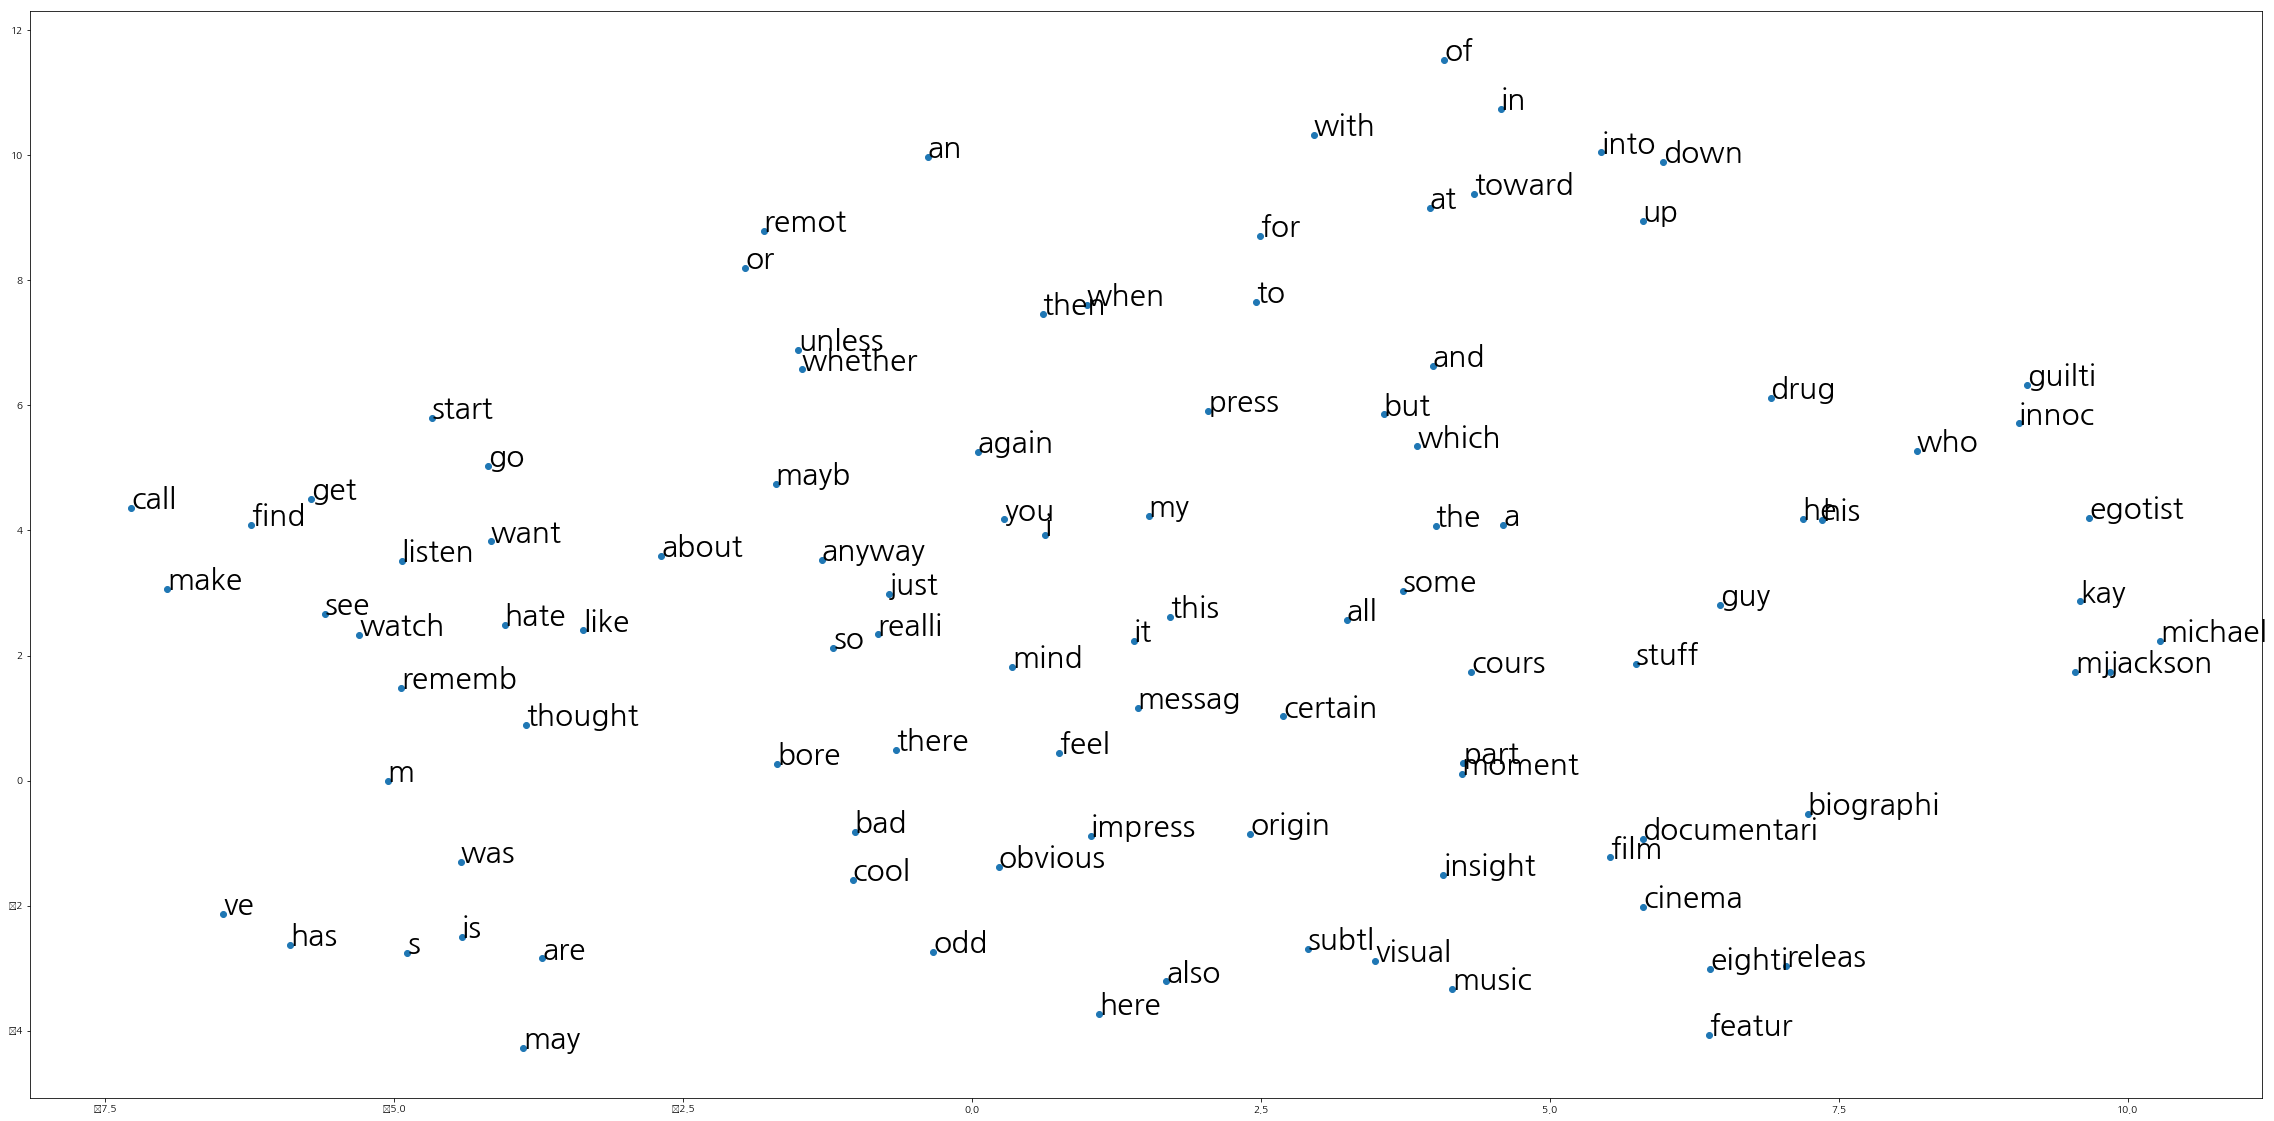

In [55]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [56]:
import numpy as np

In [57]:
def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype='float32')
    
    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec, model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [58]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화한다.
    counter = 0.
    # 속도를 위해 2D numpy 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews), num_features), dtype='float32')
    
    for review in reviews:
        # 매 1000개 리뷰마다 상태를 출력
        if counter % 1000 == 0.:
            print('Review {} of {}'.format(counter, len(reviews)))
        # 평균 feature vector를 만들기 위해 위에서 정의한 함수를 호출한다.
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model,
                                                         num_features)
        # 카운터를 증가시킨다.
        counter += 1.
    return reviewFeatureVecs

In [63]:
# multi thread 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(
        reviews['review'], KaggleWord2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [64]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features)

Review 0.0 of 25000


/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


Review 1000.0 of 25000
Review 2000.0 of 25000
Review 3000.0 of 25000
Review 4000.0 of 25000
Review 5000.0 of 25000
Review 6000.0 of 25000
Review 7000.0 of 25000
Review 8000.0 of 25000
Review 9000.0 of 25000
Review 10000.0 of 25000
Review 11000.0 of 25000
Review 12000.0 of 25000
Review 13000.0 of 25000
Review 14000.0 of 25000
Review 15000.0 of 25000
Review 16000.0 of 25000
Review 17000.0 of 25000
Review 18000.0 of 25000
Review 19000.0 of 25000
Review 20000.0 of 25000
Review 21000.0 of 25000
Review 22000.0 of 25000
Review 23000.0 of 25000
Review 24000.0 of 25000
CPU times: user 54.2 s, sys: 1.08 s, total: 55.3 s
Wall time: 1min 16s


In [65]:
%time testDataVecs = getAvgFeatureVecs(\
    getCleanReviews(test), model, num_features)

Review 0.0 of 25000


/Users/seungmoo/.pyenv/versions/3.6.0/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


Review 1000.0 of 25000
Review 2000.0 of 25000
Review 3000.0 of 25000
Review 4000.0 of 25000
Review 5000.0 of 25000
Review 6000.0 of 25000
Review 7000.0 of 25000
Review 8000.0 of 25000
Review 9000.0 of 25000
Review 10000.0 of 25000
Review 11000.0 of 25000
Review 12000.0 of 25000
Review 13000.0 of 25000
Review 14000.0 of 25000
Review 15000.0 of 25000
Review 16000.0 of 25000
Review 17000.0 of 25000
Review 18000.0 of 25000
Review 19000.0 of 25000
Review 20000.0 of 25000
Review 21000.0 of 25000
Review 22000.0 of 25000
Review 23000.0 of 25000
Review 24000.0 of 25000
CPU times: user 48.4 s, sys: 941 ms, total: 49.3 s
Wall time: 1min 9s


In [66]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=2112)

In [67]:
%time forest = forest.fit(trainDataVecs, train['sentiment'])

CPU times: user 52 s, sys: 179 ms, total: 52.2 s
Wall time: 7.09 s


In [69]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

CPU times: user 4.1 s, sys: 1.27 s, total: 5.38 s
Wall time: 1min 5s


In [80]:
score

0.905354272

In [81]:
result = forest.predict(testDataVecs)

In [84]:
output = pd.DataFrame(data={'id': test['id'], 'sentiment':result})

In [86]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[1] - output_sentiment[0])
output_sentiment

16


1    12508
0    12492
Name: sentiment, dtype: int64